# Part 2.2: Supervised Learning - Polynomial Regression

What if your data isn't linear? Polynomial Regression allows us to model non-linear relationships by adding polynomial features (e.g., x², x³, etc.) to our feature set. It's important to note that this is still considered a linear model because the coefficients we are solving for are linear.

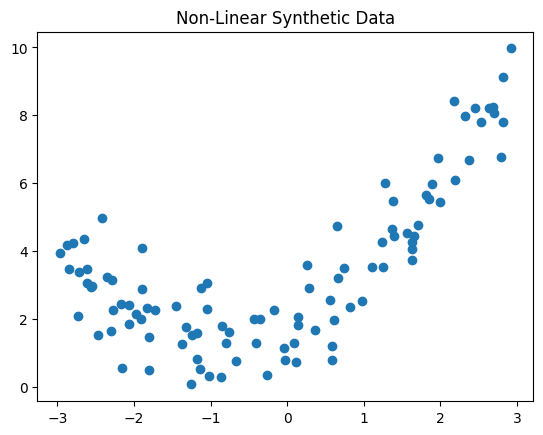

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5x^2 + x + 2 + noise

plt.scatter(X, y)
plt.title("Non-Linear Synthetic Data")
plt.show()

### Transforming Features
We use `PolynomialFeatures` to create the new, higher-order features.

In [2]:
# Let's try a 2nd degree polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("Original feature:", X[0])
print("Transformed features (x, x^2):", X_poly[0])

Original feature: [-0.75275929]
Transformed features (x, x^2): [-0.75275929  0.56664654]


### Fitting the Model
Now we can fit a standard `LinearRegression` model on these new polynomial features.

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept:", lin_reg.intercept_)
print("Coefficients (for x and x^2):", lin_reg.coef_)

# The model learned the coefficients close to our original equation (0.5, 1, 2)

Intercept: [1.78134581]
Coefficients (for x and x^2): [[0.93366893 0.56456263]]


### Visualizing the Fit
Let's plot the model's predictions to see how well it fits the non-linear data.

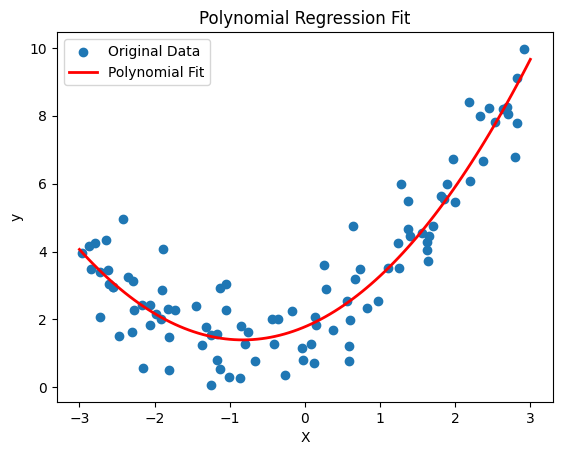

In [4]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_new, 'r-', label='Polynomial Fit', linewidth=2)
plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Caution**: Using a high degree for Polynomial Regression can easily lead to overfitting. Always check your model's performance on a validation set.